In [1]:
from tensorflow import keras
from tensorflow.keras.layers import (Dense)
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.applications import EfficientNetB2
from sklearn.model_selection import train_test_split
import sklearn.metrics
import glob
import numpy as np

In [2]:
def loadImages(path, tag, X, Y, verbose):
    pics = 0
    new_size = (260, 260)
    for file in glob.glob(path):
        image = Image.open(file)
        resized_image = image.resize(new_size)
        X.append(np.array(resized_image))
        Y.append(tag)
        pics += 1
    if verbose: print(f'En {path}, {pics} cargadas.')

def loadBreakhis(version: str, zoom: str, biclase=True, verbose=True):
    X = []
    Y = []

    if zoom not in ['40X', '100X', '200X', '400X']:
        print("Magnificacion no valida")
        return None
    
    tumores_b = ['adenosis', 'phyllodes_tumor', 
                 'tubular_adenoma', 'fibroadenoma']
    tumores_m = ['ductal_carcinoma', 'lobular_carcinoma', 
                 'mucinous_carcinoma', 'papillary_carcinoma']

    if biclase:
        for i in tumores_b:
            path = f"{version}\\benign\\{i}\\{zoom}\\*.*"
            loadImages(path, 0, X, Y, verbose)

        for i in tumores_m:
            path = f"{version}\\malign\\{i}\\{zoom}\\*.*"
            loadImages(path, 1, X, Y, verbose)

    else:
        tags_b = [0,1,2,3]
        tags_m = [4,5,6,7]

        for tumor, tag in zip(tumores_b, tags_b):
            path = f"{version}\\benign\\{tumor}\\{zoom}\\*.*"
                
            loadImages(path, tag, X, Y, verbose)

        for tumor, tag in zip(tumores_m, tags_m):
            path = f"{version}\\malign\\{tumor}\\{zoom}\\*.*"
                
            loadImages(path, tag, X, Y, verbose)
            
    return X, Y

In [3]:
def getClassificationModel(num_classes):
    base_model = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(260, 260, 3))

    base_model.trainable = False

    x = base_model.output
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = keras.models.Model(inputs=base_model.input, outputs=predictions)
    return model

In [9]:
def plot_history(history, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    ax1.set_title(f"Exactitud. {title}")
    ax1.plot(history.history['accuracy'], label=f'{title}_tr')
    ax1.plot(history.history['val_accuracy'], label=f'{title}_va')
    ax1.set_ylim(-0.1, 1.1)
    ax1.set_xlabel('Epoca')
    ax1.set_ylabel('Accuracy')
    ax1.legend()

    ax2.set_title(f"Pérdida. {title}")
    ax2.plot(history.history['loss'], label=f'{title}_tr')
    ax2.plot(history.history['val_loss'], label=f'{title}_va')
    ax2.set_ylim(-0.1, 10.1)
    ax2.set_xlabel('Epoca')
    ax2.set_ylabel('Loss')
    ax2.legend()

    plt.tight_layout()
    plt.show()

In [6]:
X, Y = loadBreakhis('breakhisV3', '400X')

En breakhisV3\benign\adenosis\400X\*.*, 225 cargadas.
En breakhisV3\benign\phyllodes_tumor\400X\*.*, 225 cargadas.
En breakhisV3\benign\tubular_adenoma\400X\*.*, 225 cargadas.
En breakhisV3\benign\fibroadenoma\400X\*.*, 225 cargadas.
En breakhisV3\malign\ductal_carcinoma\400X\*.*, 788 cargadas.
En breakhisV3\malign\lobular_carcinoma\400X\*.*, 137 cargadas.
En breakhisV3\malign\mucinous_carcinoma\400X\*.*, 169 cargadas.
En breakhisV3\malign\papillary_carcinoma\400X\*.*, 138 cargadas.


In [127]:
def plot_bars(original, modificacion, no_clases, metrica):
    org = []
    mod = []
    clases = []
    clases_2 = []

    for i in range(no_clases):
        clases.append(f"C{i}")
        clases_2.append(f"C{i} ")
        org.append(original[str(i)][metrica])
        mod.append(modificacion[str(i)][metrica])

    plt.bar(x = clases, height = org, color="blue", label='original')
    plt.bar(x = clases_2, height = mod, color="orange", label='modificado')
    plt.title(metrica)
    plt.legend(["original", "modificado"], loc = "upper right", bbox_to_anchor=(1.3, 0.6))
    plt.show()

### Original, dos clases

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.7088 - loss: 0.5978 - val_accuracy: 0.8710 - val_loss: 0.2794
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.8980 - loss: 0.2631 - val_accuracy: 0.8968 - val_loss: 0.2252
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.9129 - loss: 0.2086 - val_accuracy: 0.9256 - val_loss: 0.1789
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.9596 - loss: 0.1233 - val_accuracy: 0.9393 - val_loss: 0.1559
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.9672 - loss: 0.0974 - val_accuracy: 0.9378 - val_loss: 0.1394
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.9738 - loss: 0.0792 - val_accuracy: 0.9423 - val_loss: 0.1375
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.9831 - loss: 0.0657 - val_accuracy: 0.9423 - val_loss: 0.1259
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.9836 - loss: 0.0482 - val_accuracy: 0.9363 - val_lo

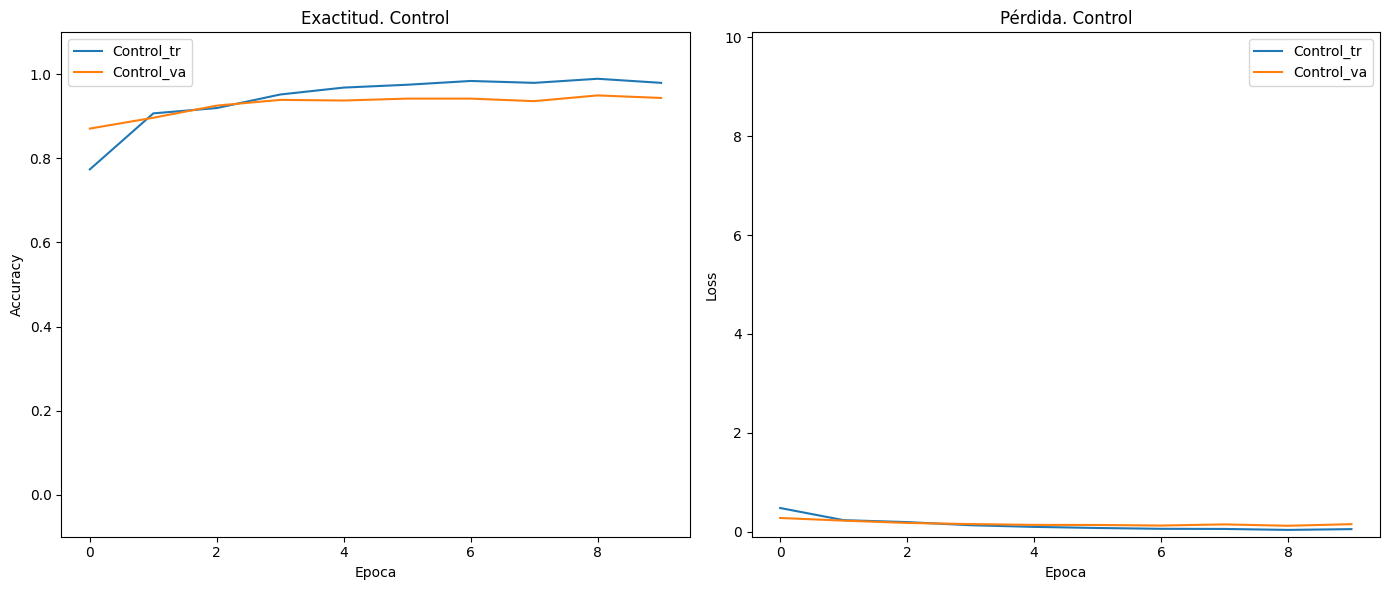

In [31]:
X_b_c, Y_b_c = loadBreakhis('breakhisV2','40X', biclase=True, verbose=False)
X_b_c_tr, X_b_c_ts, Y_b_c_tr, Y_b_c_ts = train_test_split(np.array(X_b_c), np.array(Y_b_c), test_size=0.33, stratify=Y_b_c)

model_b_c = getClassificationModel(2)
model_b_c.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

h_b_c = model_b_c.fit(X_b_c_tr, Y_b_c_tr, epochs=10, validation_data=(X_b_c_ts, Y_b_c_ts))

plot_history(h_b_c, "Original")

In [32]:
preds_b_c = []
for i in model_b_c.predict(X_b_c_ts):
    preds_b_c.append(np.argmax(i))

results_b_c = sklearn.metrics.classification_report(Y_b_c_ts, preds_b_c, output_dict=True)

21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step


### Modificación, dos clases

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.7786 - loss: 0.4236 - val_accuracy: 0.9098 - val_loss: 0.2561
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.9308 - loss: 0.1819 - val_accuracy: 0.9288 - val_loss: 0.1939
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.9378 - loss: 0.1489 - val_accuracy: 0.9428 - val_loss: 0.1892
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.9648 - loss: 0.1125 - val_accuracy: 0.9428 - val_loss: 0.2157
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.9731 - loss: 0.0854 - val_accuracy: 0.9479 - val_loss: 0.1585
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.9815 - loss: 0.0555 - val_accuracy: 0.9479 - val_loss: 0.1758
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.9879 - loss: 0.0474 - val_accuracy: 0.9314 - val_loss: 0.1920
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.9928 - loss: 0.0304 - val_accuracy: 0.9428 - v

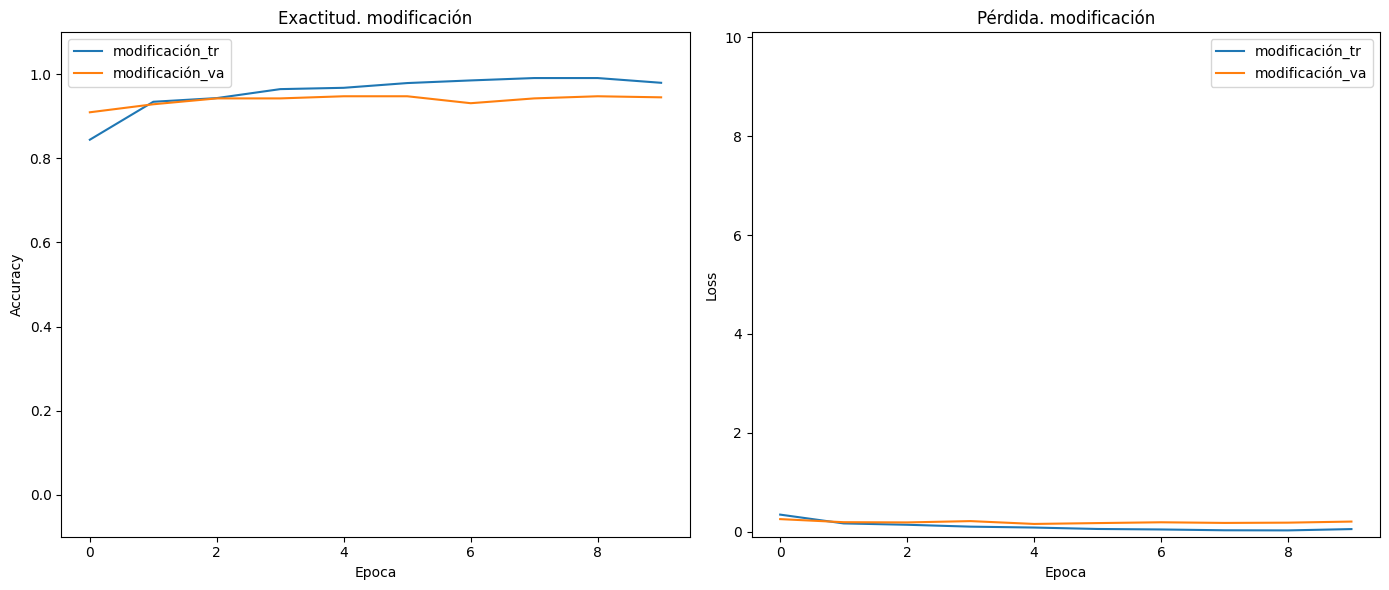

In [22]:
X_b_m, Y_b_m = loadBreakhis('breakhisV3','40X', biclase=True, verbose=False)
X_b_m_tr, X_b_m_ts, Y_b_m_tr, Y_b_m_ts = train_test_split(np.array(X_b_m), np.array(Y_b_m), test_size=0.33, stratify=Y_b_m)

model_b_m = getClassificationModel(2)

model_b_m.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

h_b_m = model_b_m.fit(X_b_m_tr, Y_b_m_tr, epochs=10, validation_data=(X_b_m_ts, Y_b_m_ts))

plot_history(h_b_m, "modificación")

In [23]:
preds_b_m = []
for i in model_b_m.predict(X_b_m_ts):
    preds_b_m.append(np.argmax(i))

results_b_m = sklearn.metrics.classification_report(Y_b_m_ts, preds_b_m, output_dict=True)

25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step


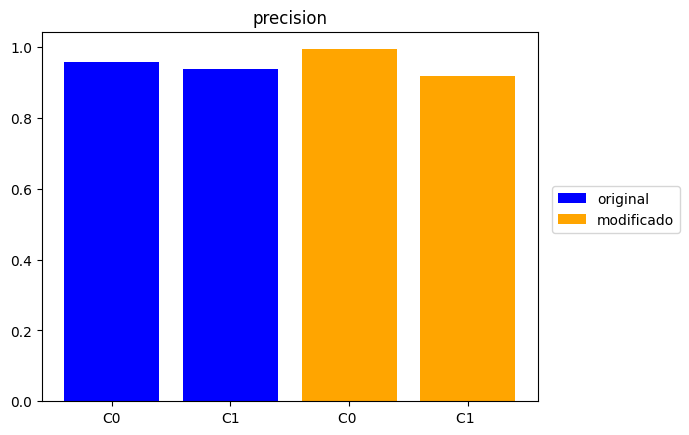

{'0': {'precision': 0.9567567567567568, 'recall': 0.8592233009708737, 'f1-score': 0.9053708439897699, 'support': 206.0}, '1': {'precision': 0.9388185654008439, 'recall': 0.9823399558498896, 'f1-score': 0.9600862998921251, 'support': 453.0}, 'accuracy': 0.9438543247344461, 'macro avg': {'precision': 0.9477876610788003, 'recall': 0.9207816284103817, 'f1-score': 0.9327285719409475, 'support': 659.0}, 'weighted avg': {'precision': 0.9444259514696117, 'recall': 0.9438543247344461, 'f1-score': 0.942982530672269, 'support': 659.0}}
{'0': {'precision': 0.9932203389830508, 'recall': 0.8772455089820359, 'f1-score': 0.931637519872814, 'support': 334.0}, '1': {'precision': 0.9166666666666666, 'recall': 0.9955849889624724, 'f1-score': 0.9544973544973545, 'support': 453.0}, 'accuracy': 0.9453621346886912, 'macro avg': {'precision': 0.9549435028248587, 'recall': 0.9364152489722541, 'f1-score': 0.9430674371850842, 'support': 787.0}, 'weighted avg': {'precision': 0.9491557728339758, 'recall': 0.9453621

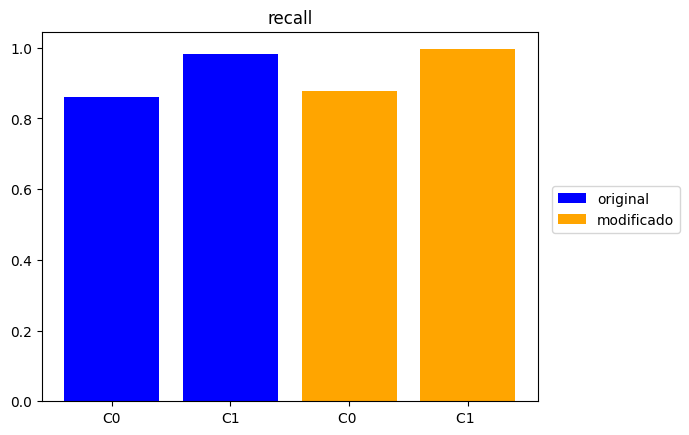

{'0': {'precision': 0.9567567567567568, 'recall': 0.8592233009708737, 'f1-score': 0.9053708439897699, 'support': 206.0}, '1': {'precision': 0.9388185654008439, 'recall': 0.9823399558498896, 'f1-score': 0.9600862998921251, 'support': 453.0}, 'accuracy': 0.9438543247344461, 'macro avg': {'precision': 0.9477876610788003, 'recall': 0.9207816284103817, 'f1-score': 0.9327285719409475, 'support': 659.0}, 'weighted avg': {'precision': 0.9444259514696117, 'recall': 0.9438543247344461, 'f1-score': 0.942982530672269, 'support': 659.0}}
{'0': {'precision': 0.9932203389830508, 'recall': 0.8772455089820359, 'f1-score': 0.931637519872814, 'support': 334.0}, '1': {'precision': 0.9166666666666666, 'recall': 0.9955849889624724, 'f1-score': 0.9544973544973545, 'support': 453.0}, 'accuracy': 0.9453621346886912, 'macro avg': {'precision': 0.9549435028248587, 'recall': 0.9364152489722541, 'f1-score': 0.9430674371850842, 'support': 787.0}, 'weighted avg': {'precision': 0.9491557728339758, 'recall': 0.9453621

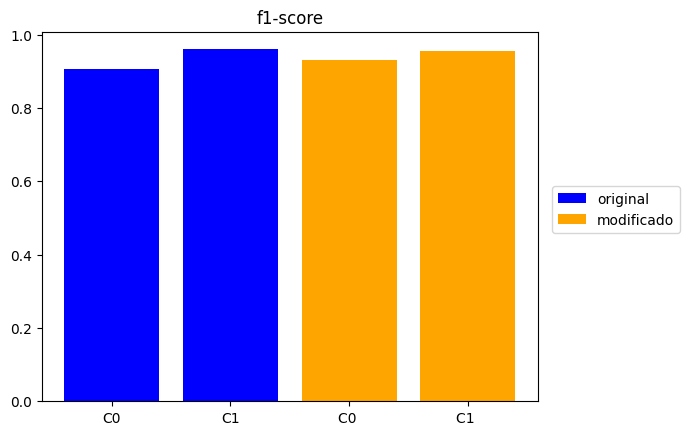

{'0': {'precision': 0.9567567567567568, 'recall': 0.8592233009708737, 'f1-score': 0.9053708439897699, 'support': 206.0}, '1': {'precision': 0.9388185654008439, 'recall': 0.9823399558498896, 'f1-score': 0.9600862998921251, 'support': 453.0}, 'accuracy': 0.9438543247344461, 'macro avg': {'precision': 0.9477876610788003, 'recall': 0.9207816284103817, 'f1-score': 0.9327285719409475, 'support': 659.0}, 'weighted avg': {'precision': 0.9444259514696117, 'recall': 0.9438543247344461, 'f1-score': 0.942982530672269, 'support': 659.0}}
{'0': {'precision': 0.9932203389830508, 'recall': 0.8772455089820359, 'f1-score': 0.931637519872814, 'support': 334.0}, '1': {'precision': 0.9166666666666666, 'recall': 0.9955849889624724, 'f1-score': 0.9544973544973545, 'support': 453.0}, 'accuracy': 0.9453621346886912, 'macro avg': {'precision': 0.9549435028248587, 'recall': 0.9364152489722541, 'f1-score': 0.9430674371850842, 'support': 787.0}, 'weighted avg': {'precision': 0.9491557728339758, 'recall': 0.9453621

In [125]:
plot_bars(results_b_c, results_b_m, 2, 'precision')
plot_bars(results_b_c, results_b_m, 2, 'recall')
plot_bars(results_b_c, results_b_m, 2, 'f1-score')

### Original, multiclase

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.4669 - loss: 1.5083 - val_accuracy: 0.6677 - val_loss: 0.9580
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.7050 - loss: 0.8083 - val_accuracy: 0.7360 - val_loss: 0.7791
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.7962 - loss: 0.6133 - val_accuracy: 0.7420 - val_loss: 0.6909
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.8671 - loss: 0.4004 - val_accuracy: 0.7436 - val_loss: 0.6844
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.8875 - loss: 0.3274 - val_accuracy: 0.7542 - val_loss: 0.6512
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.8996 - loss: 0.3213 - val_accuracy: 0.7921 - val_loss: 0.5720
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.9370 - loss: 0.2195 - val_accuracy: 0.7891 - val_loss: 0.5716
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9419 - loss: 0.2044 - val_accuracy: 0.7967 - val_loss

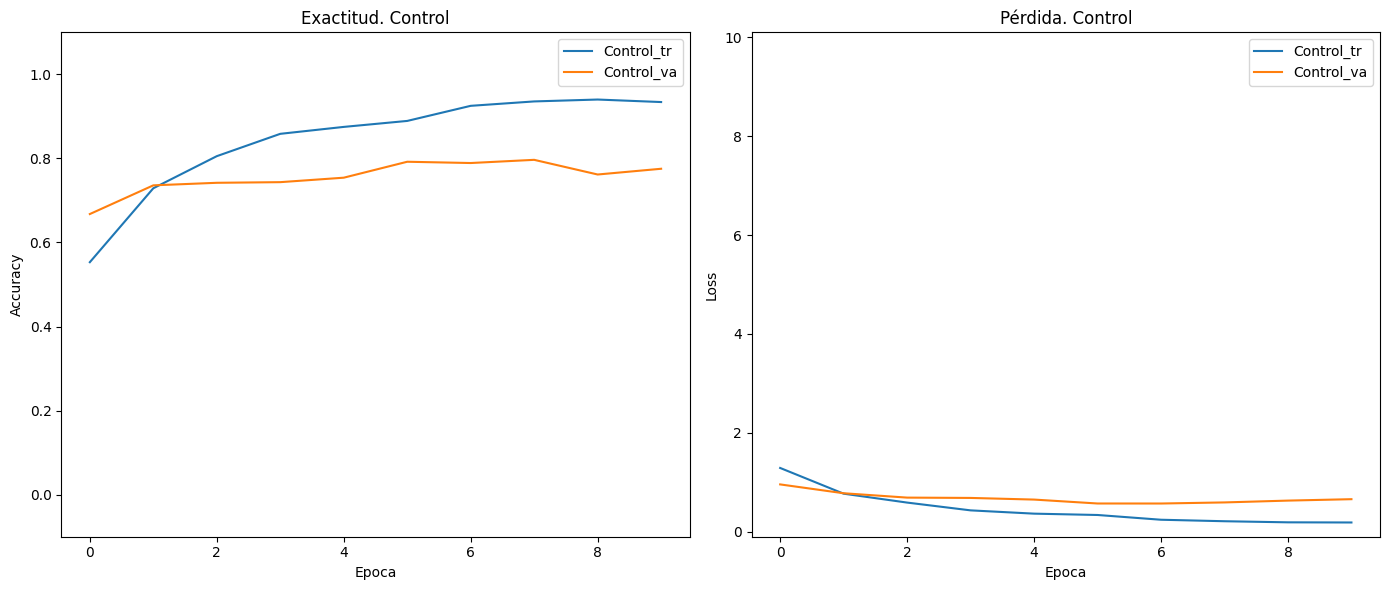

In [25]:
X_m_c, Y_m_c = loadBreakhis('breakhisV2','40X', biclase=False, verbose=False)
X_m_c_tr, X_m_c_ts, Y_m_c_tr, Y_m_c_ts = train_test_split(np.array(X_m_c), np.array(Y_m_c), test_size=0.33, stratify=Y_m_c)

model_m_c = getClassificationModel(8)

model_m_c.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

h_m_c = model_m_c.fit(X_m_c_tr, Y_m_c_tr, epochs=10, validation_data=(X_m_c_ts, Y_m_c_ts))

plot_history(h_m_c, "Original")

In [26]:
preds_m_c = []
for i in model_m_c.predict(X_m_c_ts):
    preds_m_c.append(np.argmax(i))

results_m_c = sklearn.metrics.classification_report(Y_m_c_ts, preds_m_c, output_dict=True)

21/21 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step


### Modificación, multiclase

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.5076 - loss: 1.4700 - val_accuracy: 0.7268 - val_loss: 0.8116
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.7609 - loss: 0.6965 - val_accuracy: 0.7446 - val_loss: 0.7205
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.8513 - loss: 0.4591 - val_accuracy: 0.7510 - val_loss: 0.6830
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.8771 - loss: 0.3670 - val_accuracy: 0.7408 - val_loss: 0.6925
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.8469 - loss: 0.3928 - val_accuracy: 0.7967 - val_loss: 0.5787
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.9152 - loss: 0.2785 - val_accuracy: 0.7967 - val_loss: 0.5568
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.9200 - loss: 0.2330 - val_accuracy: 0.8107 - val_loss: 0.6024
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.9272 - loss: 0.1920 - val_accuracy: 0.8285 - v

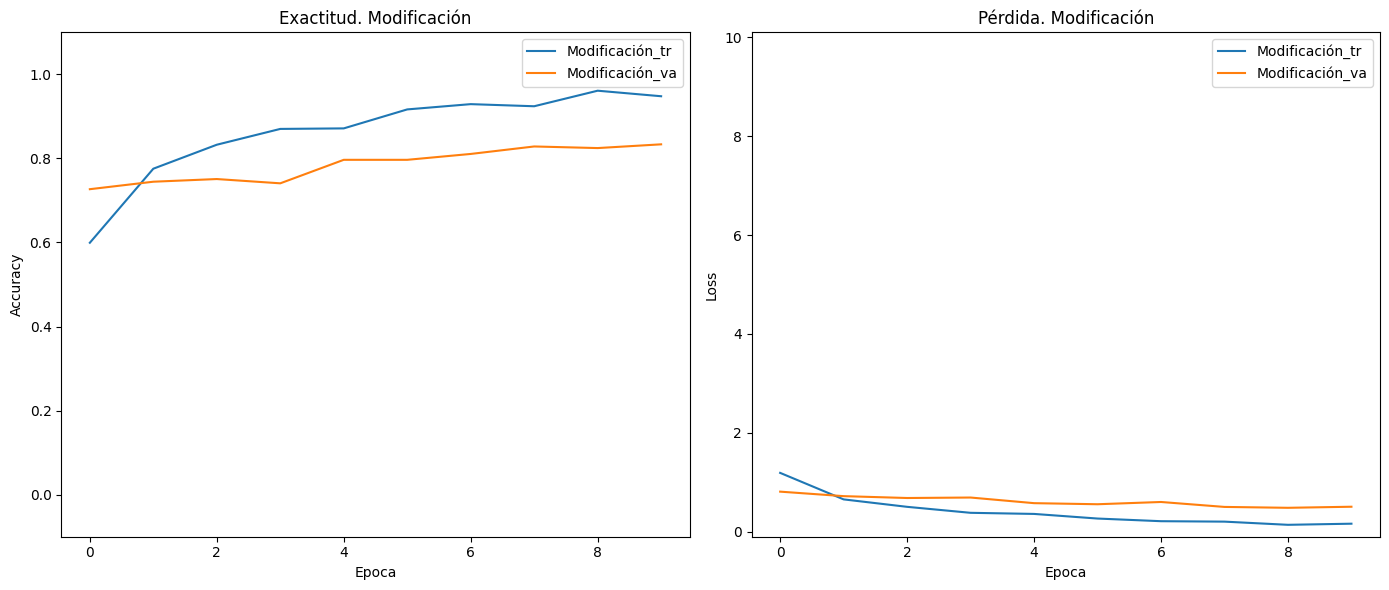

In [27]:
X_m_m, Y_m_m = loadBreakhis('breakhisV3','40X', biclase=False, verbose=False)
X_m_m_tr, X_m_m_ts, Y_m_m_tr, Y_m_m_ts = train_test_split(np.array(X_m_m), np.array(Y_m_m), test_size=0.33, stratify=Y_m_m)

model_m_m = getClassificationModel(8)

model_m_m.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

h_m_m = model_m_m.fit(X_m_m_tr, Y_m_m_tr, epochs=10, validation_data=(X_m_m_ts, Y_m_m_ts))

plot_history(h_m_m, "Modificación")

In [29]:
preds_m_m = []
for i in model_m_m.predict(X_m_m_ts):
    preds_m_m.append(np.argmax(i))

results_m_m = sklearn.metrics.classification_report(Y_m_m_ts, preds_m_m, output_dict=True)

25/25 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step


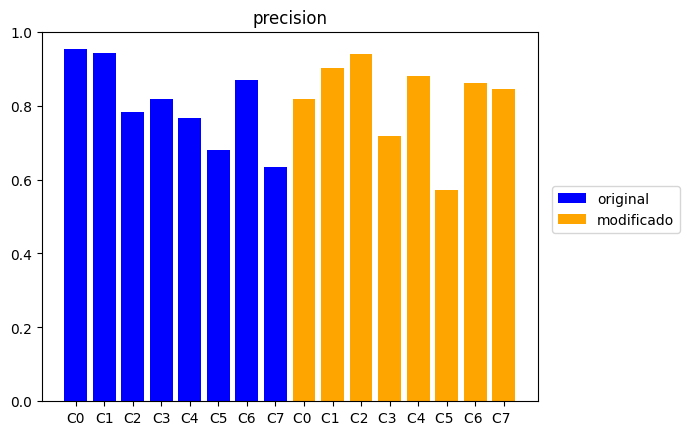

{'0': {'precision': 0.9523809523809523, 'recall': 0.5263157894736842, 'f1-score': 0.6779661016949152, 'support': 38.0}, '1': {'precision': 0.9411764705882353, 'recall': 0.4444444444444444, 'f1-score': 0.6037735849056604, 'support': 36.0}, '2': {'precision': 0.7818181818181819, 'recall': 0.8775510204081632, 'f1-score': 0.8269230769230769, 'support': 49.0}, '3': {'precision': 0.8181818181818182, 'recall': 0.75, 'f1-score': 0.782608695652174, 'support': 84.0}, '4': {'precision': 0.7665706051873199, 'recall': 0.9333333333333333, 'f1-score': 0.8417721518987342, 'support': 285.0}, '5': {'precision': 0.6808510638297872, 'recall': 0.6274509803921569, 'f1-score': 0.6530612244897959, 'support': 51.0}, '6': {'precision': 0.8695652173913043, 'recall': 0.5882352941176471, 'f1-score': 0.7017543859649122, 'support': 68.0}, '7': {'precision': 0.6326530612244898, 'recall': 0.6458333333333334, 'f1-score': 0.6391752577319587, 'support': 48.0}, 'accuracy': 0.7754172989377845, 'macro avg': {'precision': 0.

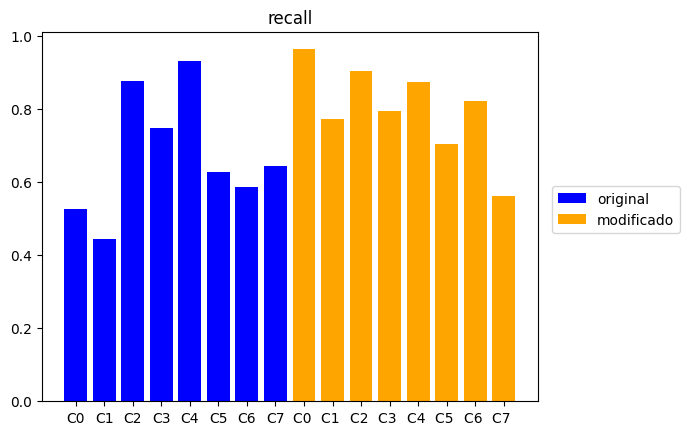

{'0': {'precision': 0.9523809523809523, 'recall': 0.5263157894736842, 'f1-score': 0.6779661016949152, 'support': 38.0}, '1': {'precision': 0.9411764705882353, 'recall': 0.4444444444444444, 'f1-score': 0.6037735849056604, 'support': 36.0}, '2': {'precision': 0.7818181818181819, 'recall': 0.8775510204081632, 'f1-score': 0.8269230769230769, 'support': 49.0}, '3': {'precision': 0.8181818181818182, 'recall': 0.75, 'f1-score': 0.782608695652174, 'support': 84.0}, '4': {'precision': 0.7665706051873199, 'recall': 0.9333333333333333, 'f1-score': 0.8417721518987342, 'support': 285.0}, '5': {'precision': 0.6808510638297872, 'recall': 0.6274509803921569, 'f1-score': 0.6530612244897959, 'support': 51.0}, '6': {'precision': 0.8695652173913043, 'recall': 0.5882352941176471, 'f1-score': 0.7017543859649122, 'support': 68.0}, '7': {'precision': 0.6326530612244898, 'recall': 0.6458333333333334, 'f1-score': 0.6391752577319587, 'support': 48.0}, 'accuracy': 0.7754172989377845, 'macro avg': {'precision': 0.

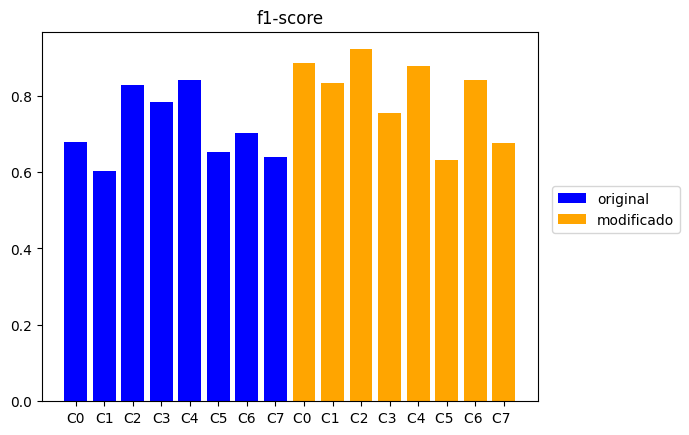

{'0': {'precision': 0.9523809523809523, 'recall': 0.5263157894736842, 'f1-score': 0.6779661016949152, 'support': 38.0}, '1': {'precision': 0.9411764705882353, 'recall': 0.4444444444444444, 'f1-score': 0.6037735849056604, 'support': 36.0}, '2': {'precision': 0.7818181818181819, 'recall': 0.8775510204081632, 'f1-score': 0.8269230769230769, 'support': 49.0}, '3': {'precision': 0.8181818181818182, 'recall': 0.75, 'f1-score': 0.782608695652174, 'support': 84.0}, '4': {'precision': 0.7665706051873199, 'recall': 0.9333333333333333, 'f1-score': 0.8417721518987342, 'support': 285.0}, '5': {'precision': 0.6808510638297872, 'recall': 0.6274509803921569, 'f1-score': 0.6530612244897959, 'support': 51.0}, '6': {'precision': 0.8695652173913043, 'recall': 0.5882352941176471, 'f1-score': 0.7017543859649122, 'support': 68.0}, '7': {'precision': 0.6326530612244898, 'recall': 0.6458333333333334, 'f1-score': 0.6391752577319587, 'support': 48.0}, 'accuracy': 0.7754172989377845, 'macro avg': {'precision': 0.

In [126]:
plot_bars(results_m_c, results_m_m, 8, 'precision')
plot_bars(results_m_c, results_m_m, 8, 'recall')
plot_bars(results_m_c, results_m_m, 8, 'f1-score')